In [1]:
import cv2
import glob
import os
import matplotlib.pyplot as plt
import bbox_method

In [2]:
label_path = 'C:/Users/Ino/Desktop/NextChip/dataset/labels/train'
txt_list = glob.glob(label_path + '/*.txt')
print(len(txt_list))

12732


In [3]:
l_list = bbox_method.get_box_class(txt_list[0])
print(l_list)

1 0.22734374999999998 0.3416666666666667 0.14375 0.10833333333333334

1 0.36874999999999997 0.3125 0.0296875 0.025

3 0.445703125 0.30486111111111114 0.03203125 0.0625

3 0.3984375 0.30972222222222223 0.015625 0.022222222222222223

[['1', '0.22734374999999998', '0.3416666666666667', '0.14375', '0.10833333333333334'], ['1', '0.36874999999999997', '0.3125', '0.0296875', '0.025'], ['3', '0.445703125', '0.30486111111111114', '0.03203125', '0.0625'], ['3', '0.3984375', '0.30972222222222223', '0.015625', '0.022222222222222223']]


In [77]:
with open(txt_list[0], 'r') as f:
    line_list = []
    for line in f:
        line_list.append(line)

print(line_list)

['1 0.22734374999999998 0.3416666666666667 0.14375 0.10833333333333334\n', '1 0.36874999999999997 0.3125 0.0296875 0.025\n', '3 0.445703125 0.30486111111111114 0.03203125 0.0625\n', '3 0.3984375 0.30972222222222223 0.015625 0.022222222222222223\n']


In [78]:
a, b, c, d, e = line_list[0].split(' ')
print(e)

0.10833333333333334



In [79]:
def check_result(gt_path): #, pred_path):
    gt_line = []
    pr_line = []

    img_path = gt_path.replace('labels', 'images')[:-3] + 'jpg'
    print(img_path)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    
    with open(gt_path, 'r') as gt:
        for line in gt:
            gt_line.append(line)
            cls, center_x, center_y, width, height = line.split(' ')
            center_x = float(center_x)
            center_y = float(center_y)
            width = float(width)
            height = float(height)
            #print(center_x, center_y, width, height)
            pt1 = (int(1280*(center_x - 0.5*width)), int(720*(center_y - 0.5*height)))
            pt2 = (int(1280*(center_x + 0.5*width)), int(720*(center_y + 0.5*height)))
            print(pt1, pt2)
            cv2.rectangle(img, pt1, pt2, (255, 255, 0), 2)

    #with open(pred_path, 'r') as pr:
    #    for line in pr:
    #        pr_line.append(line)

    cv2.imshow('img', img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [80]:
check_result(txt_list[20])

C:/Users/Ino/Desktop/NextChip/dataset/images/train\10014.jpg
0.925390625 0.3847222222222222 0.04921875 0.07777777777777778
(1153, 249) (1216, 304)
0.4921875 0.3270833333333333 0.0125 0.015277777777777777
(622, 229) (638, 240)
0.5179687500000001 0.325 0.0140625 0.025
(654, 225) (672, 243)
0.43984375000000003 0.32916666666666666 0.0171875 0.019444444444444445
(552, 229) (574, 244)
0.38398437500000004 0.32708333333333334 0.03046875 0.034722222222222224
(472, 223) (511, 248)
0.04140625 0.35624999999999996 0.0125 0.07916666666666666
(45, 228) (61, 284)
0.1375 0.3520833333333333 0.009375 0.06527777777777778
(170, 229) (182, 277)
0.248046875 0.3416666666666667 0.00859375 0.03611111111111111
(312, 233) (323, 259)
0.25898437500000004 0.34305555555555556 0.00703125 0.03333333333333333
(327, 235) (336, 259)
0.284765625 0.3361111111111111 0.00546875 0.041666666666666664
(361, 227) (368, 256)
0.296875 0.3375 0.00625 0.03333333333333333
(376, 231) (384, 255)
0.30156249999999996 0.3361111111111111 0.

In [6]:
def make_histo(gt_label_path):
    file_list = os.listdir(gt_label_path)
    area_list = []
    
    for name in file_list:
        with open(f'{gt_label_path}/{name}', 'r') as txt_file:
            for line in txt_file:
                a, b, c, w, h = line.split(' ')
                w = float(w)
                h = float(h)
                area = 1280*720*(w*h)
                area_list.append(area)

    print(len(area_list))
    return area_list

In [7]:
a_list = make_histo(label_path)

88862


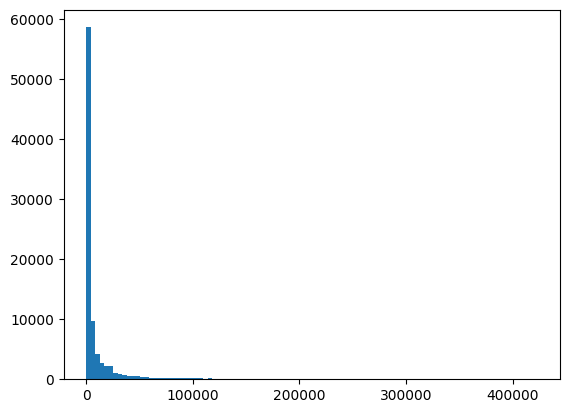

921600


In [8]:
plt.hist(a_list, bins=100)
#plt.xlim([0, 10000])
plt.show()
print(1280*720)

In [9]:
# plt.boxplot(a_list)
# plt.show()